<a href="https://colab.research.google.com/github/Bhoomij123/Python/blob/main/Full_Bagging_RandomForest_Stacking_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging, Random Forest & Stacking – Practical Assignment

This notebook contains solutions for all the given ensemble learning practical questions:

- Bagging Classifier & Regressor
- Random Forest Classifier & Regressor
- Hyperparameter tuning, feature importance, metrics
- Stacking Classifiers


## 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Bagging Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Bagging Decision Tree Accuracy: 1.0


## 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Bagging Decision Tree Regressor MSE:", mean_squared_error(y_test, y_pred))

Bagging Decision Tree Regressor MSE: 0.2572988359842641


## 3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

print("Feature importances:")
for name, imp in zip(data.feature_names, rf_clf.feature_importances_):
    print(f"{name}: {imp:.4f}")

Feature importances:
mean radius: 0.0348
mean texture: 0.0152
mean perimeter: 0.0680
mean area: 0.0605
mean smoothness: 0.0080
mean compactness: 0.0116
mean concavity: 0.0669
mean concave points: 0.1070
mean symmetry: 0.0034
mean fractal dimension: 0.0026
radius error: 0.0143
texture error: 0.0037
perimeter error: 0.0101
area error: 0.0296
smoothness error: 0.0047
compactness error: 0.0056
concavity error: 0.0058
concave points error: 0.0038
symmetry error: 0.0035
fractal dimension error: 0.0059
worst radius: 0.0828
worst texture: 0.0175
worst perimeter: 0.0808
worst area: 0.1394
worst smoothness: 0.0122
worst compactness: 0.0199
worst concavity: 0.0373
worst concave points: 0.1322
worst symmetry: 0.0082
worst fractal dimension: 0.0045


## 4. Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

tree.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Decision Tree MSE: 0.495235205629094
Random Forest MSE: 0.2553684927247781


## 5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [5]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier

X, y = load_wine(return_X_y=True)

rf_oob = RandomForestClassifier(n_estimators=200, oob_score=True, bootstrap=True, random_state=42)
rf_oob.fit(X, y)
print("OOB Score:", rf_oob.oob_score_)

OOB Score: 0.9831460674157303


## 6. Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

bag_svm = BaggingClassifier(SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)
print("Bagging SVM Accuracy:", accuracy_score(y_test, y_pred))

Bagging SVM Accuracy: 0.9333333333333333


## 7. Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [7]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"n_estimators={n}: accuracy={acc:.4f}")

n_estimators=10: accuracy=1.0000
n_estimators=50: accuracy=1.0000
n_estimators=100: accuracy=1.0000
n_estimators=200: accuracy=1.0000


## 8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

bag_log = BaggingClassifier(LogisticRegression(max_iter=2000), n_estimators=20, random_state=42)
bag_log.fit(X_train, y_train)
y_proba = bag_log.predict_proba(X_test)[:, 1]
print("Bagging Logistic Regression AUC:", roc_auc_score(y_test, y_proba))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Logistic Regression AUC: 0.9947089947089947


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 9. Train a Random Forest Regressor and analyze feature importance scores

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

housing = fetch_california_housing()
X, y = housing.data, housing.target

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)

print("Feature importances:")
for name, imp in zip(housing.feature_names, rf_reg.feature_importances_):
    print(f"{name}: {imp:.4f}")

Feature importances:
MedInc: 0.5200
HouseAge: 0.0530
AveRooms: 0.0445
AveBedrms: 0.0293
Population: 0.0312
AveOccup: 0.1364
Latitude: 0.0929
Longitude: 0.0927


## 10. Train an ensemble model using both Bagging and Random Forest and compare accuracy

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=50, random_state=42)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

acc_bag = accuracy_score(y_test, bag.predict(X_test))
acc_rf = accuracy_score(y_test, rf.predict(X_test))

print("Bagging accuracy:", acc_bag)
print("Random Forest accuracy:", acc_rf)

Bagging accuracy: 1.0
Random Forest accuracy: 1.0


## 11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5, 10],
    "max_features": ["sqrt", "log2"]
}

grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
print("Test accuracy:", grid.score(X_test, y_test))

Best params: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Best CV score: 0.956043956043956
Test accuracy: 0.956140350877193


## 12. Train a Bagging Regressor with different numbers of base estimators and compare performance

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in [10, 30, 50, 100]:
    bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"n_estimators={n}: MSE={mse:.4f}")

n_estimators=10: MSE=0.2824
n_estimators=30: MSE=0.2612
n_estimators=50: MSE=0.2573
n_estimators=100: MSE=0.2559


## 13. Train a Random Forest Classifier and analyze misclassified samples

In [13]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mis_idx = (y_pred != y_test)

print("Total misclassified samples:", mis_idx.sum())
print("Indices of misclassified samples in test set:")
print([i for i, m in enumerate(mis_idx) if m])

Total misclassified samples: 0
Indices of misclassified samples in test set:
[]


## 14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

In [14]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tree = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)

tree.fit(X_train, y_train)
bag.fit(X_train, y_train)

acc_tree = accuracy_score(y_test, tree.predict(X_test))
acc_bag = accuracy_score(y_test, bag.predict(X_test))

print("Decision Tree accuracy:", acc_tree)
print("Bagging accuracy      :", acc_bag)

Decision Tree accuracy: 0.9444444444444444
Bagging accuracy      : 1.0


## 15. Train a Random Forest Classifier and visualize the confusion matrix

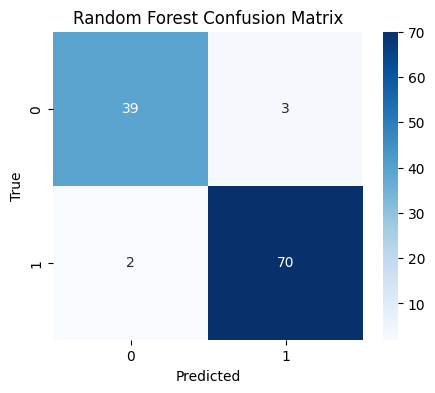

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.show()

## 16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

estimators = [
    ("dt", DecisionTreeClassifier(random_state=42)),
    ("svm", SVC(probability=True, random_state=42))
]

stack = StackingClassifier(estimators=estimators,
                           final_estimator=LogisticRegression(max_iter=2000),
                           passthrough=False)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("Stacking Classifier accuracy:", accuracy_score(y_test, y_pred))

Stacking Classifier accuracy: 0.9722222222222222


## 17. Train a Random Forest Classifier and print the top 5 most important features

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:5]

print("Top 5 features:")
for idx in indices:
    print(f"{data.feature_names[idx]}: {importances[idx]:.4f}")

Top 5 features:
worst area: 0.1394
worst concave points: 0.1322
mean concave points: 0.1070
worst radius: 0.0828
worst perimeter: 0.0808


## 18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

Precision: 0.9452054794520548
Recall   : 0.9583333333333334
F1-score : 0.9517241379310345


## 19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

In [19]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for depth in [None, 3, 5, 10]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"max_depth={depth}: accuracy={acc:.4f}")

max_depth=None: accuracy=1.0000
max_depth=3: accuracy=1.0000
max_depth=5: accuracy=1.0000
max_depth=10: accuracy=1.0000


## 20. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50, random_state=42)
knn_bag = BaggingRegressor(KNeighborsRegressor(), n_estimators=50, random_state=42)

dt_bag.fit(X_train, y_train)
knn_bag.fit(X_train, y_train)

mse_dt = mean_squared_error(y_test, dt_bag.predict(X_test))
mse_knn = mean_squared_error(y_test, knn_bag.predict(X_test))

print("Bagging DecisionTree MSE:", mse_dt)
print("Bagging KNeighbors MSE  :", mse_knn)

Bagging DecisionTree MSE: 0.2572988359842641
Bagging KNeighbors MSE  : 1.0762752887085227


## 21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print("Random Forest ROC-AUC:", auc)

Random Forest ROC-AUC: 0.9937169312169312


## 22. Train a Bagging Classifier and evaluate its performance using cross-validation

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = load_wine(return_X_y=True)

bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
scores = cross_val_score(bag, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.94444444 0.88888889 0.97222222 0.97142857 1.        ]
Average accuracy: 0.9553968253968254


## 23. Train a Random Forest Classifier and plot the Precision-Recall curve

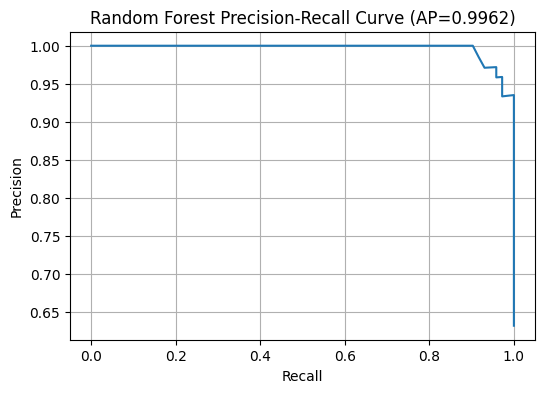

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_scores = rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Random Forest Precision-Recall Curve (AP={avg_precision:.4f})")
plt.grid(True)
plt.show()

## 24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [24]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

estimators = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
]

stack = StackingClassifier(estimators=estimators,
                           final_estimator=LogisticRegression(max_iter=2000))

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

rf_alone = RandomForestClassifier(n_estimators=100, random_state=42)
rf_alone.fit(X_train, y_train)
y_pred_rf = rf_alone.predict(X_test)

print("Stacking accuracy:", accuracy_score(y_test, y_pred_stack))
print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))

Stacking accuracy: 1.0
Random Forest accuracy: 1.0


## 25. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for max_samples in [0.5, 0.7, 1.0]:
    bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50,
                               max_samples=max_samples, bootstrap=True,
                               random_state=42)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"max_samples={max_samples}: MSE={mse:.4f}")

max_samples=0.5: MSE=0.2664
max_samples=0.7: MSE=0.2638
